# Kaggle
## Titanic competition

# Data exploration

## Data import

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display 
import seaborn as sns; sns.set()
import visuals as vs
from sklearn.preprocessing import MinMaxScaler, Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances_argmin, silhouette_score, accuracy_score, confusion_matrix
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
#from keras import Sequential
#from keras.utils import np_utils
#from keras.layers import Dense, Dropout
#from keras.callbacks import ModelCheckpoint  
from sklearn.model_selection import StratifiedKFold
#from keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Load the dataset
try:
    dataset = pd.read_csv("data/train.csv")
    print("Passengers dataset has {} samples with {} features each.".format(*dataset.shape))
except Exception as e:
    print("Dataset could not be loaded. Is the dataset missing? ", str(e))

Passengers dataset has 891 samples with 12 features each.


Lets take a first look to dataset. We are interested in knowing number, type, range of values and empty parameters in order to take further decisions about.

In [3]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Let's first check how many empty values are in each feature. 

In [4]:
for (columnName, columnData) in dataset.iteritems():
   empty_values = columnData.isna().sum()
   print('Colunm: ', columnName, '** Empty : ', empty_values, '** Empty percentage: ', empty_values/len(columnData))

Colunm:  PassengerId ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Survived ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Pclass ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Name ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Sex ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Age ** Empty :  177 ** Empty percentage:  0.19865319865319866
Colunm:  SibSp ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Parch ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Ticket ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Fare ** Empty :  0 ** Empty percentage:  0.0
Colunm:  Cabin ** Empty :  687 ** Empty percentage:  0.7710437710437711
Colunm:  Embarked ** Empty :  2 ** Empty percentage:  0.002244668911335578


In [5]:
for (columnName, columnData) in dataset.iteritems():
    print('*************', columnName, '**************')
    print(len(dataset[columnName].unique()))
    print(dataset.groupby(columnName).mean())

************* PassengerId **************
891
             Survived  Pclass   Age  SibSp  Parch     Fare
PassengerId                                               
1                   0       3  22.0      1      0   7.2500
2                   1       1  38.0      1      0  71.2833
3                   1       3  26.0      0      0   7.9250
4                   1       1  35.0      1      0  53.1000
5                   0       3  35.0      0      0   8.0500
...               ...     ...   ...    ...    ...      ...
887                 0       2  27.0      0      0  13.0000
888                 1       1  19.0      0      0  30.0000
889                 0       3   NaN      1      2  23.4500
890                 1       1  26.0      0      0  30.0000
891                 0       3  32.0      0      0   7.7500

[891 rows x 6 columns]
************* Survived **************
2
          PassengerId    Pclass        Age     SibSp     Parch       Fare
Survived                                          

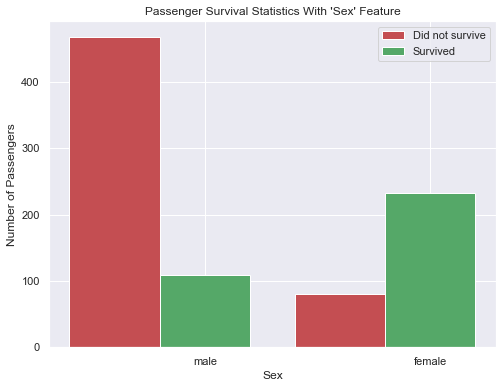

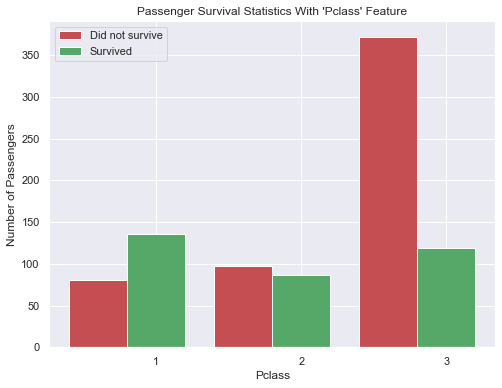

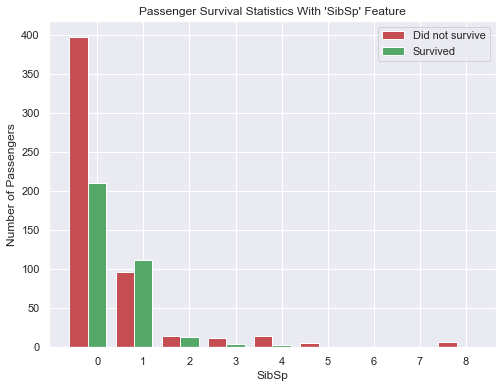

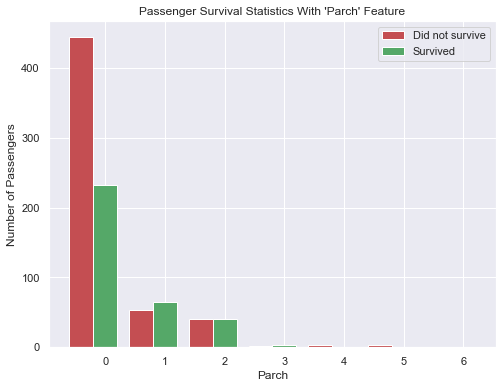

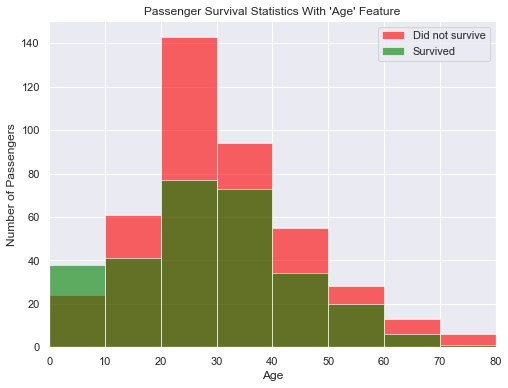

In [6]:
vs.survival_stats(dataset.drop('Survived', axis=1), dataset['Survived'], 'Sex')
vs.survival_stats(dataset.drop('Survived', axis=1), dataset['Survived'], 'Pclass')
vs.survival_stats(dataset.drop('Survived', axis=1), dataset['Survived'], 'SibSp')
vs.survival_stats(dataset.drop('Survived', axis=1), dataset['Survived'], 'Parch')
vs.survival_stats(dataset.drop('Survived', axis=1), dataset['Survived'], 'Age')

In [7]:
#First lets drop 'PasangerId'
dataset.drop('PassengerId',axis=1, inplace=True)
#SAVE ORIGINAL DATASET
survival_original = dataset['Survived']
features_original = dataset.drop('Survived', axis = 1)
features_original.to_pickle('data/features_original.pkl')
survival_original.to_pickle('data/survival_original.pkl')

In [8]:
#Age column has a significant number of empty values. Lets fill in with mean
imputer = Imputer(missing_values='NaN' ,strategy='mean')
imputer = imputer.fit(dataset[['Age']])
dataset[['Age']] = imputer.transform(dataset[['Age']])

/usr/local/anaconda3/envs/ucp/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Let's analize each feature based on above results. Most of rows have an empty value for Cabin. Does it mean it is a useless feature. Let's see if empty values are significant when related with Survived

In [9]:
dataset.head(10)
alive = len(dataset.loc[(dataset['Survived'] == 1) & (dataset['Cabin'].isnull())])
dead = len(dataset.loc[(dataset['Survived'] == 0) & (dataset['Cabin'].isnull())])
#Sin cabina
print('Without cabin alive/dead', alive/dead)
alive = len(dataset.loc[(dataset['Survived'] == 1) & (dataset['Cabin'].notnull())])
dead = len(dataset.loc[(dataset['Survived'] == 0) & (dataset['Cabin'].notnull())])
print('With cabin alive/dead', alive/dead)

Without cabin alive/dead 0.4282744282744283
With cabin alive/dead 2.0


It seems so. So, let's fill in empty values.

In [10]:
dataset.loc[dataset['Cabin'].notnull(), 'Cabin'] = 1
dataset['Cabin'].fillna(0, inplace=True)

Remove useless features but it seems name length could be related with survival

In [11]:
dataset['NameLength'] = dataset.apply(lambda row: len(row.Name), axis = 1) 
dataset.groupby('NameLength').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
NameLength,,,,,,,
12,0.500000,3.000000,29.699118,0.000000,0.000000,56.495800,0.000000
13,0.500000,3.000000,30.000000,0.000000,0.000000,56.495800,0.000000
14,0.333333,3.000000,26.566373,0.000000,0.000000,23.591667,0.000000
15,0.133333,2.866667,31.986431,0.000000,0.000000,15.626100,0.000000
16,0.230769,2.653846,32.465113,0.076923,0.076923,29.052723,0.115385
17,0.214286,2.523810,32.528235,0.261905,0.190476,21.680550,0.142857
18,0.200000,2.620000,30.047700,0.420000,0.300000,21.128164,0.100000
19,0.234375,2.546875,29.545009,0.281250,0.140625,22.648567,0.125000
20,0.282051,2.487179,29.240867,0.333333,0.076923,24.525426,0.102564


In [13]:
#dataset.drop('PassengerId', axis=1, inplace=True)
dataset.drop('Name', axis=1, inplace=True)
dataset.drop('Ticket', axis=1, inplace=True)

finally, let's encode sex and embarked columns

In [14]:
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].value_counts().index[0])
dataset = pd.get_dummies(dataset, columns=['Embarked'])
dataset['Sex'].replace(['female','male'],[0,1],inplace=True)
dataset = pd.get_dummies(dataset, columns=['Pclass'])

In [15]:
dataset.head(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,NameLength,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.000000,1,0,7.2500,0,23,0,0,1,0,0,1
1,1,0,38.000000,1,0,71.2833,1,51,1,0,0,1,0,0
2,1,0,26.000000,0,0,7.9250,0,22,0,0,1,0,0,1
3,1,0,35.000000,1,0,53.1000,1,44,0,0,1,1,0,0
4,0,1,35.000000,0,0,8.0500,0,24,0,0,1,0,0,1
5,0,1,29.699118,0,0,8.4583,0,16,0,1,0,0,0,1
6,0,1,54.000000,0,0,51.8625,1,23,0,0,1,1,0,0
7,0,1,2.000000,3,1,21.0750,0,30,0,0,1,0,0,1
8,1,0,27.000000,0,2,11.1333,0,49,0,0,1,0,0,1
9,1,0,14.000000,1,0,30.0708,0,35,1,0,0,0,1,0


Let's see graphically which is the disease distribution inside dataset.

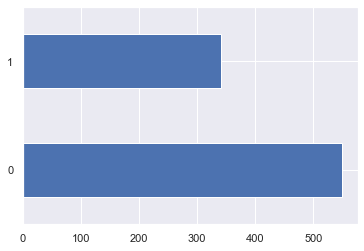

In [16]:
dataset['Survived'].value_counts()[:20].plot(kind='barh')

In [17]:
#SAVE NEW FEATURES DATASET
survival_new_features = dataset['Survived']
features_new_features = dataset.drop('Survived', axis = 1)
features_new_features.to_pickle('data/features_new_features.pkl')
survival_new_features.to_pickle('data/survival_new_features.pkl')

## Log transform

In [18]:
dataset.head(10)

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,NameLength,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.000000,1,0,7.2500,0,23,0,0,1,0,0,1
1,1,0,38.000000,1,0,71.2833,1,51,1,0,0,1,0,0
2,1,0,26.000000,0,0,7.9250,0,22,0,0,1,0,0,1
3,1,0,35.000000,1,0,53.1000,1,44,0,0,1,1,0,0
4,0,1,35.000000,0,0,8.0500,0,24,0,0,1,0,0,1
5,0,1,29.699118,0,0,8.4583,0,16,0,1,0,0,0,1
6,0,1,54.000000,0,0,51.8625,1,23,0,0,1,1,0,0
7,0,1,2.000000,3,1,21.0750,0,30,0,0,1,0,0,1
8,1,0,27.000000,0,2,11.1333,0,49,0,0,1,0,0,1
9,1,0,14.000000,1,0,30.0708,0,35,1,0,0,0,1,0


In [19]:
#TODO: Check id fill in nana values with feature mean works better
dataset = dataset.dropna()
print(len(dataset))

891


In [20]:
#SAVE DROPNAN DATASET
survival_dropnan = dataset['Survived']
features_dropnan = dataset.drop('Survived', axis = 1)
features_dropnan.to_pickle('data/features_dropnan.pkl')
survival_dropnan.to_pickle('data/survival_dropnan.pkl')

In [21]:
print(dataset['Survived'])
# Split the data into features and target label
survival_raw = dataset['Survived']
features_raw = dataset.drop('Survived', axis = 1)
print(len(survival_raw))

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
891


Let going to log transform to numerical values to ensure all values are in range [0,1]

In [22]:
# Log transform numerical value colums
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[['Age','Fare','NameLength']] = features_raw[['Age','Fare','NameLength']].apply(lambda x: np.log(x + 1))

scaler = MinMaxScaler() # default=(0, 1)

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[['Age','Fare','NameLength']] = scaler.fit_transform(features_log_transformed[['Age','Fare','NameLength']])

display(features_log_minmax_transform.head(n = 5))

,Sex,Age,SibSp,Parch,Fare,Cabin,NameLength,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0.688670,1,0,0.338125,0,0.330712,0,0,1,0,0,1
1,0,0.819257,1,0,0.685892,1,0.747775,1,0,0,1,0,0
2,0,0.728321,0,0,0.350727,0,0.307755,0,0,1,0,0,1
3,0,0.799463,1,0,0.639463,1,0.669787,0,0,1,1,0,0
4,1,0.799463,0,0,0.352955,0,0.352732,0,0,1,0,0,1


In [23]:
#SAVE LOGTRANSFORM DATASET
features_log_minmax_transform.to_pickle('data/features_logtransform.pkl')
survival_dropnan.to_pickle('data/survival_logtransform.pkl')

## Remove outliers

In [24]:
# For each integer feature find the data points with extreme high or low values
# List to store outliers detected in loop
dataset = features_log_minmax_transform
all_outliers = []
for feature in dataset.columns :
    
    Q1 = np.percentile(dataset[feature], 25)
    Q3 = np.percentile(dataset[feature], 75)
    step = (Q3 - Q1)*1.5
    
    feature_outliers = dataset[~((dataset[feature] >= Q1 - step) & (dataset[feature] <= Q3 + step))]
    if len(feature_outliers) == 0 :
        continue
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(feature_outliers)
    
    all_outliers.extend(feature_outliers.index.values)
    
import collections
outliers =  [item for item, count in collections.Counter(all_outliers).items() if count > 1]
print('Outliers detected in more than one feature:',len(outliers))
print('Original records:',len(dataset))


Data points considered outliers for the feature 'Age':


,Sex,Age,SibSp,Parch,Fare,Cabin,NameLength,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
7,1,0.184964,3,1,0.495832,0,0.468764,0,0,1,0,0,1
10,0,0.311287,1,1,0.460439,1,0.485890,0,0,1,0,0,1
16,1,0.184964,4,1,0.545650,0,0.258685,0,1,0,0,0,1
24,0,0.456643,3,1,0.495832,0,0.451077,0,0,1,0,0,1
43,0,0.256106,1,2,0.601092,0,0.619574,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,1,0.062728,1,1,0.477999,0,0.485890,0,0,1,0,1,0
850,1,0.311287,4,2,0.556696,0,0.606255,0,0,1,0,0,1
851,1,0.980968,0,0,0.348011,0,0.232367,0,0,1,0,0,1
852,0,0.482697,1,1,0.446703,0,0.330712,1,0,0,0,0,1


Data points considered outliers for the feature 'SibSp':


,Sex,Age,SibSp,Parch,Fare,Cabin,NameLength,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
7,1,0.184964,3,1,0.495832,0,0.468764,0,0,1,0,0,1
16,1,0.184964,4,1,0.545650,0,0.258685,0,1,0,0,0,1
24,0,0.456643,3,1,0.495832,0,0.451077,0,0,1,0,0,1
27,1,0.654108,3,2,0.893450,1,0.468764,0,0,1,1,0,0
50,1,0.427516,4,1,0.593810,0,0.394245,0,0,1,0,0,1
59,1,0.527784,5,2,0.619959,0,0.534227,0,0,1,0,0,1
63,1,0.311287,3,2,0.538998,0,0.283778,0,0,1,0,0,1
68,0,0.628053,4,2,0.350727,0,0.485890,0,0,1,0,0,1
71,0,0.613918,5,2,0.619959,0,0.394245,0,0,1,0,0,1
85,0,0.785328,3,0,0.452554,0,0.787750,0,0,1,0,0,1


Data points considered outliers for the feature 'Parch':


,Sex,Age,SibSp,Parch,Fare,Cabin,NameLength,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
7,1,0.184964,3,1,0.495832,0,0.468764,0,0,1,0,0,1
8,0,0.737315,0,2,0.399934,0,0.726620,0,0,1,0,0,1
10,0,0.311287,1,1,0.460439,1,0.485890,0,0,1,0,0,1
13,1,0.825518,1,5,0.556696,0,0.413862,0,0,1,0,0,1
16,1,0.184964,4,1,0.545650,0,0.258685,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0,0.870605,1,1,0.637838,1,0.715722,0,0,1,1,0,0
879,0,0.913102,0,1,0.710264,1,0.681643,1,0,0,1,0,0
880,0,0.718988,0,1,0.528101,0,0.669787,0,0,1,0,1,0
885,0,0.825518,0,5,0.545650,0,0.564202,0,1,0,0,0,1


Data points considered outliers for the feature 'Fare':


,Sex,Age,SibSp,Parch,Fare,Cabin,NameLength,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
27,1,0.654108,3,2,0.893450,1,0.468764,0,0,1,1,0,0
88,0,0.699194,3,2,0.893450,1,0.394245,0,0,1,1,0,0
118,1,0.709289,0,1,0.883769,1,0.352732,1,0,0,1,0,0
179,1,0.806239,0,0,0.000000,0,0.232367,0,0,1,0,0,1
258,0,0.799463,0,0,1.000000,0,0.144703,1,0,0,1,0,0
263,1,0.831624,0,0,0.000000,1,0.283778,0,0,1,1,0,0
271,1,0.718988,0,0,0.000000,0,0.432790,0,0,1,0,0,1
277,1,0.760073,0,0,0.000000,0,0.413862,0,0,1,0,1,0
299,0,0.885597,0,1,0.883769,1,0.704600,1,0,0,1,0,0
302,1,0.654108,0,0,0.000000,0,0.485890,0,0,1,0,0,1


Data points considered outliers for the feature 'Cabin':


,Sex,Age,SibSp,Parch,Fare,Cabin,NameLength,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
1,0,0.819257,1,0,0.685892,1,0.747775,1,0,0,1,0,0
3,0,0.799463,1,0,0.639463,1,0.669787,0,0,1,1,0,0
6,1,0.904269,0,0,0.635755,1,0.330712,0,0,1,1,0,0
10,0,0.311287,1,1,0.460439,1,0.485890,0,0,1,0,0,1
11,0,0.921630,0,0,0.531333,1,0.352732,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0,0.870605,1,1,0.637838,1,0.715722,0,0,1,1,0,0
872,1,0.785328,0,0,0.287099,1,0.352732,0,0,1,1,0,0
879,0,0.913102,0,1,0.710264,1,0.681643,1,0,0,1,0,0
887,0,0.654108,0,0,0.550238,1,0.432790,0,0,1,1,0,0


Data points considered outliers for the feature 'NameLength':


,Sex,Age,SibSp,Parch,Fare,Cabin,NameLength,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
18,0,0.770336,1,0,0.471796,0,0.787750,0,0,1,0,0,1
25,0,0.819257,1,5,0.557253,0,0.806678,0,0,1,0,0,1
41,0,0.737315,1,0,0.495287,0,0.797297,0,0,1,0,1,0
85,0,0.785328,3,0,0.452554,0,0.787750,0,0,1,0,0,1
307,0,0.628053,1,0,0.753026,1,1.000000,1,0,0,1,0,0
319,0,0.831624,1,1,0.786579,1,0.797297,1,0,0,1,0,0
427,0,0.654108,0,0,0.528101,0,0.892479,0,0,1,0,1,0
556,0,0.875704,1,0,0.593465,1,0.876376,1,0,0,1,0,0
610,0,0.825518,1,5,0.556696,0,0.806678,0,0,1,0,0,1
670,0,0.831624,1,1,0.591080,0,0.842652,0,0,1,0,1,0


Data points considered outliers for the feature 'Embarked_C':


,Sex,Age,SibSp,Parch,Fare,Cabin,NameLength,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
1,0,0.819257,1,0,0.685892,1,0.747775,1,0,0,1,0,0
9,0,0.582966,1,0,0.550603,0,0.549423,1,0,0,0,1,0
19,0,0.760073,0,0,0.337639,0,0.330712,1,0,0,0,0,1
26,1,0.760073,0,0,0.337639,0,0.330712,1,0,0,0,0,1
30,1,0.831624,0,0,0.538001,0,0.352732,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,0,0.737315,1,0,0.432398,0,0.432790,1,0,0,0,1,0
874,0,0.745993,1,0,0.515770,0,0.578587,1,0,0,0,1,0
875,0,0.598926,0,0,0.337639,0,0.502488,1,0,0,0,0,1
879,0,0.913102,0,1,0.710264,1,0.681643,1,0,0,1,0,0


Data points considered outliers for the feature 'Embarked_Q':


,Sex,Age,SibSp,Parch,Fare,Cabin,NameLength,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
5,1,0.760073,0,0,0.360026,0,0.144703,0,1,0,0,0,1
16,1,0.184964,4,1,0.545650,0,0.258685,0,1,0,0,0,1
22,0,0.598926,0,0,0.352587,0,0.413862,0,1,0,0,0,1
28,0,0.760073,0,0,0.349902,0,0.451077,0,1,0,0,0,1
32,0,0.760073,0,0,0.347554,0,0.352732,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,1,0.760073,0,0,0.347554,0,0.352732,0,1,0,0,0,1
825,1,0.760073,0,0,0.332190,0,0.112002,0,1,0,0,0,1
828,1,0.760073,0,0,0.347554,0,0.432790,0,1,0,0,0,1
885,0,0.825518,0,5,0.545650,0,0.564202,0,1,0,0,0,1


Data points considered outliers for the feature 'Pclass_1':


,Sex,Age,SibSp,Parch,Fare,Cabin,NameLength,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
1,0,0.819257,1,0,0.685892,1,0.747775,1,0,0,1,0,0
3,0,0.799463,1,0,0.639463,1,0.669787,0,0,1,1,0,0
6,1,0.904269,0,0,0.635755,1,0.330712,0,0,1,1,0,0
11,0,0.921630,0,0,0.531333,1,0.352732,0,0,1,1,0,0
23,1,0.745993,0,0,0.576408,1,0.432790,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0,0.870605,1,1,0.637838,1,0.715722,0,0,1,1,0,0
872,1,0.785328,0,0,0.287099,1,0.352732,0,0,1,1,0,0
879,0,0.913102,0,1,0.710264,1,0.681643,1,0,0,1,0,0
887,0,0.654108,0,0,0.550238,1,0.432790,0,0,1,1,0,0


Data points considered outliers for the feature 'Pclass_2':


,Sex,Age,SibSp,Parch,Fare,Cabin,NameLength,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
9,0,0.582966,1,0,0.550603,0,0.549423,1,0,0,0,1,0
15,0,0.908725,0,0,0.453974,0,0.502488,0,0,1,0,1,0
17,1,0.760073,0,0,0.422864,0,0.432790,0,0,1,0,1,0
20,1,0.799463,0,0,0.528101,0,0.258685,0,0,1,0,1,0
21,1,0.792496,0,0,0.422864,1,0.283778,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,0,0.737315,1,0,0.432398,0,0.432790,1,0,0,0,1,0
874,0,0.745993,1,0,0.515770,0,0.578587,1,0,0,0,1,0
880,0,0.718988,0,1,0.528101,0,0.669787,0,0,1,0,1,0
883,1,0.745993,0,0,0.391344,0,0.451077,0,0,1,0,1,0


Outliers detected in more than one feature: 366
Original records: 891


In [25]:
print('Original records:',len(dataset))
dataset.drop(outliers, inplace=True)
survival_raw.drop(outliers, inplace=True)   
print('Records once outliers have been removed:',len(dataset))

Original records: 891
Records once outliers have been removed: 525


In [26]:
print(len(dataset))
print(len(survival_raw))

525
525


We have to delete outliers in diagnosis_raw in order to keep same amount of records in features and label dataset.

## Summary

At this point, we have available the following variables, that will be used extensively in the next sections:

- good_data: Regularized features dataset (without outliers)
- diagnosis: Dataset containing Labels corresponding to features dataset,
- number_of_diseases: Number of different diseases to diagnose

We are going to store these datasets in files on order to use them throughout next sections without needing to execute all previous code.

In [27]:
dataset.to_pickle('data/features_outliers.pkl')
survival_raw.to_pickle('data/survival_ourliers.pkl')

# Prediction Model

- **dataset**: Imported from `data/good_data.pkl` file. Regularized features dataset (without outliers) 
- **diagnosis**: Imported from `data/diagnosis_raw.pkl` file. Dataset containing Labels corresponding to features dataset.

In [28]:
dataset = pd.read_pickle('data/features_outliers.pkl')
survival = pd.read_pickle('data/survival_ourliers.pkl')
print(len(dataset))
print(len(survival))
print(len(dataset.columns))

525
525
13


## Split data into training and testing sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dataset, survival, test_size=0.2)
print(X_train)

     Sex       Age  SibSp  Parch      Fare  Cabin  NameLength  Embarked_C  \
12     1  0.666173      0      0  0.352955      0    0.468764           0   
478    1  0.688670      0      0  0.343301      0    0.373888           0   
725    1  0.666173      0      0  0.363449      0    0.232367           0   
665    1  0.777946      2      0  0.690732      0    0.204699           0   
566    1  0.654108      0      0  0.350202      0    0.258685           0   
..   ...       ...    ...    ...       ...    ...         ...         ...   
302    1  0.654108      0      0  0.000000      0    0.485890           0   
876    1  0.666173      0      0  0.381960      0    0.451077           0   
638    0  0.837583      0      5  0.593810      0    0.592598           0   
569    1  0.777946      0      0  0.349451      0    0.175535           0   
821    1  0.737315      0      0  0.363449      0    0.175535           0   

     Embarked_Q  Embarked_S  Pclass_1  Pclass_2  Pclass_3  
12            0

In [30]:
import statsmodels.api as sm
logit_model=sm.Logit(survival,dataset)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.404948
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.274     
Dependent Variable: Survived         AIC:              449.1952  
Date:               2020-03-30 21:43 BIC:              500.3560  
No. Observations:   525              Log-Likelihood:   -212.60   
Df Model:           11               LL-Null:          -292.73   
Df Residuals:       513              LLR p-value:      1.1823e-28
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Sex           -2.6688    0.2909  -9.1730  0.0000  -3.2391  -2.0986
Age           -1.0718    1.7141  -0.6253  0.5318  -4.4315   2.

/usr/local/anaconda3/envs/ucp/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/anaconda3/envs/ucp/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/anaconda3/envs/ucp/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/anaconda3/envs/ucp/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [84]:
#Delete valirables with p-value > 0,05
dataset.drop('Pclass', axis=1, inplace=True)
dataset.drop('Embarked', axis=1, inplace=True)

In [85]:
dataset.to_pickle('data/features_p_values.pkl')
survival_raw.to_pickle('data/survival_p_values.pkl')

In [31]:
logit_model=sm.Logit(survival,dataset)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.404948
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.274     
Dependent Variable: Survived         AIC:              449.1952  
Date:               2020-03-30 21:43 BIC:              500.3560  
No. Observations:   525              Log-Likelihood:   -212.60   
Df Model:           11               LL-Null:          -292.73   
Df Residuals:       513              LLR p-value:      1.1823e-28
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Sex           -2.6688    0.2909  -9.1730  0.0000  -3.2391  -2.0986
Age           -1.0718    1.7141  -0.6253  0.5318  -4.4315   2.

1. Raw dataset
2. Processed dataset
3. Regularization
4. Outliers
5. Delete p-value > 0,05

In [120]:
dataset = pd.read_pickle('data/features_p_values.pkl')
survival = pd.read_pickle('data/survival_p_values.pkl')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(dataset, survival, test_size=0.2, random_state=0)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest)
print(random_forest.score(X_test, y_test))

99.52
0.819047619047619


## Eval model: accuracy

In [34]:
# Accuracy over training set
eval_model=random_forest.evaluate(X_train, y_train)
print("Accuracy using training set:",eval_model[1])

AttributeError: 'RandomForestClassifier' object has no attribute 'evaluate'

In [35]:
# Accuracy over testing set
classifier.load_weights('saved_models/weights.best.hdf5')
y_pred=classifier.predict(X_test)
y_pred = (y_pred > 0.5)
print("Accuracy using testing set:",accuracy_score(y_test, y_pred))

NameError: name 'classifier' is not defined

## Confusion matrix

([<matplotlib.axis.YTick at 0x1a5f1129d0>,
 <a list of 9 Text yticklabel objects>)

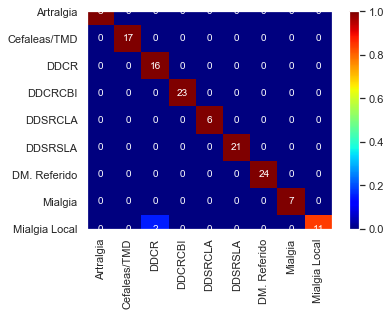

In [25]:
# We have to change one hot encoded values for real prediction values
#diagnosis_raw[np.argmax(predicted_value)]
#confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
pred = []
for i in y_pred :
    pred.append(diagnosis_raw[np.argmax(i)])
    
test = []
for i in y_test:
    test.append(diagnosis_raw[np.argmax(i)])

cm = confusion_matrix(test, pred)

norm_conf = []
for i in cm:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
ax.grid(False)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = cm.shape
for x in range(width):
    for y in range(height):
        ax.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center', color='white')

cb = fig.colorbar(res)
plt.xticks(range(width), np.unique(diagnosis_raw)[:width], rotation=90)
plt.yticks(range(height), np.unique(diagnosis_raw)[:height])

## Implement a prediction function

In [40]:
def diagnosis(answers,classifier):
    predicted_value = classifier.predict(answers)
    return diagnosis_raw[np.argmax(predicted_value)]

print(diagnosis(X_test[:1],classifier_1))

DDSRSLA


## K-fold cross validation

In [32]:
# define 10-fold cross validation test harness
X = dataset
Y = pd.read_pickle('data/diagnosis.pkl')
kfold = StratifiedKFold(n_splits=10, shuffle=True)
cvscores = []
for train, test in kfold.split(X, Y):
    
    # We have to use raw data before split and then on hot encode
    encoder.fit(Y[train])
    encoded_Y = encoder.transform(Y[train])
    dummy_y_train = np_utils.to_categorical(encoded_Y)
    
    encoder.fit(Y[test])
    encoded_Y = encoder.transform(Y[test])
    dummy_y_test = np_utils.to_categorical(encoded_Y)
     
    #Model
    classifier = Sequential()
    classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=len(dataset.columns)))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal'),)
    classifier.add(Dropout(0.2))
    classifier.add(Dense(number_of_diseases, activation='softmax', kernel_initializer='random_normal'))
    classifier.add(Dropout(0.2))
    
    # Fit & evaluate
    classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
    classifier.fit(X.iloc[train], dummy_y_train, validation_split=0.25, epochs=100, batch_size=10, verbose=0)
    scores = classifier.evaluate(X.iloc[test], dummy_y_test, verbose=0)
    print("%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

acc: 99.50%
acc: 99.49%
acc: 99.47%
acc: 99.73%
acc: 100.00%
acc: 100.00%
acc: 99.72%
acc: 100.00%
acc: 100.00%
acc: 99.72%
99.76% (+/- 0.21%)
